# Linear regression with OHE data

In [1]:
import pandas
import sklearn
from sklearn import model_selection, linear_model, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error
import numpy as np

In [155]:
rxns_df_x = pandas.read_csv("godineau2023_reactions_OHE.csv")
rxns_x = rxns_df_x.to_numpy().copy()
rxns_x = np.delete(rxns_x, 0, 1)
rxns_df_x = rxns_df_x.drop("Unnamed: 0", axis=1)
rxns_df_x

,Cu(OAc)2,Cu2O,CuBr,CuCl,CuI,L1,L10,L11,L12,L2,...,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8,Round 9,EI,TS,UCB
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
260,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
261,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
262,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [156]:
rxns_df_y = pandas.read_csv("godineau2023_yields_OHE.csv")
rxns_y = rxns_df_y.to_numpy().copy()
rxns_y = np.delete(rxns_y, 0, axis=1)
rxns_df_y = rxns_df_y[["Yield of 3aa"]]
rxns_df_y

,Yield of 3aa
0,0.00
1,0.00
2,0.00
3,20.63
4,0.00
...,...
259,3.73
260,1.18
261,0.00
262,0.45


In [157]:
x_train, x_temp, y_train, y_temp = train_test_split(rxns_df_x, rxns_y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5,random_state=42)

In [158]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [159]:
#validation
y_val_pred = model.predict(x_val)
#accuracy = model.score(y_val_pred, y_val)
accuracy = r2_score(y_val, y_val_pred)
print(f'Validation Accuracy with r2 :{accuracy}')
MAE_val = mean_absolute_error(y_val, y_val_pred)
RMSE_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE:{RMSE_val}")
print(f'Validation MAE:{MAE_val}')

#testing
y_test_pred = model.predict(x_test)
accuracy_test = r2_score(y_test, y_test_pred)
#accuracy_test = model.score(y_test_pred, y_test)
print(f'Test Set Accuracy with r2 : {accuracy_test}')
MAE_test = mean_absolute_error(y_test, y_test_pred)
RMSE_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE:{RMSE_test}")
print(f'Test MAE:{MAE_test}')

Validation Accuracy with r2 :0.4525090204463075
Validation RMSE:15.12765505622071
Validation MAE:12.348749999999999
Test Set Accuracy with r2 : 0.4069585446149443
Test RMSE:16.586310921962124
Test MAE:12.353


This is not the most accurate model we've seen.

In [160]:
import shap

In [161]:
explainer = shap.LinearExplainer(model, x_train)
shap.Explainer(model, x_train)

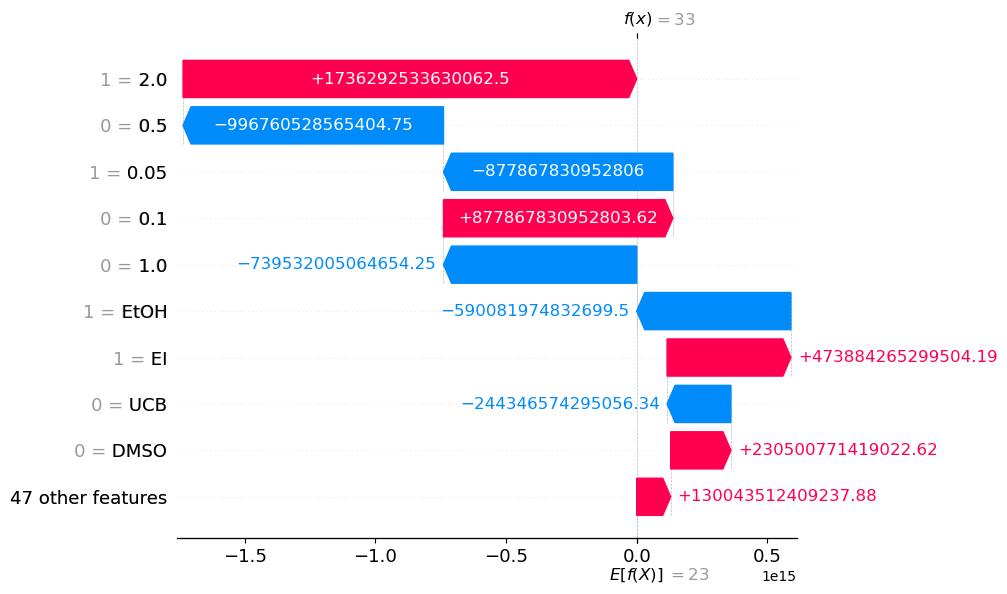

In [162]:
shap_values = explainer(x_val)
shap.plots.waterfall(shap_values[0])

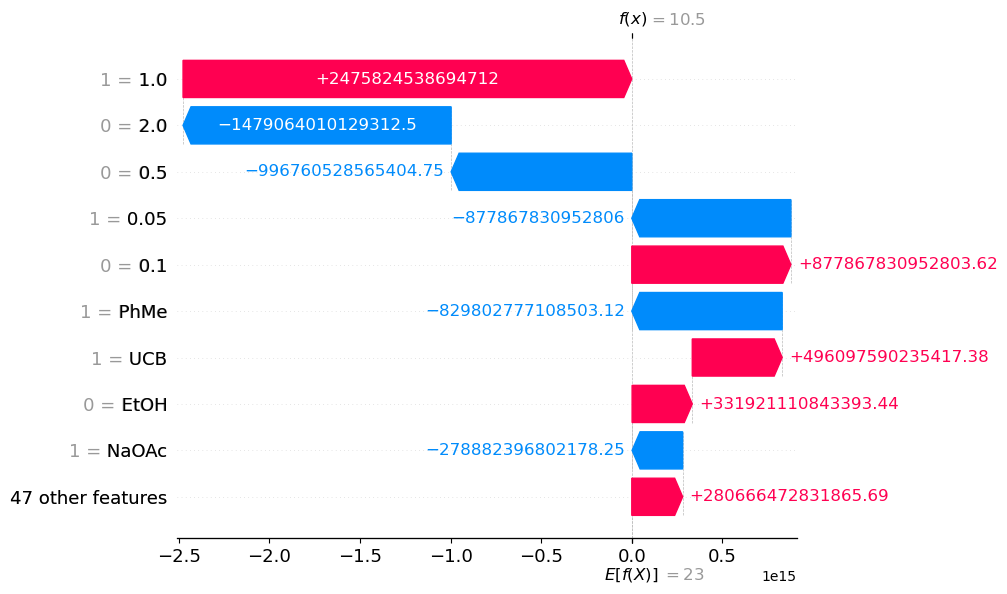

In [164]:
shap.plots.waterfall(shap_values[1])

Here, the SHAP values of the equivalents in base and ligand are very high, but they tend to cancel themselves out so their effect isn't so important in the end. Observations:
- A 2.0 equivalent in base seems to be the best to make the yield higher.
- Using PhMe as solvent makes the yield lower.
- Using NaOAc as base makes the yield lower 

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


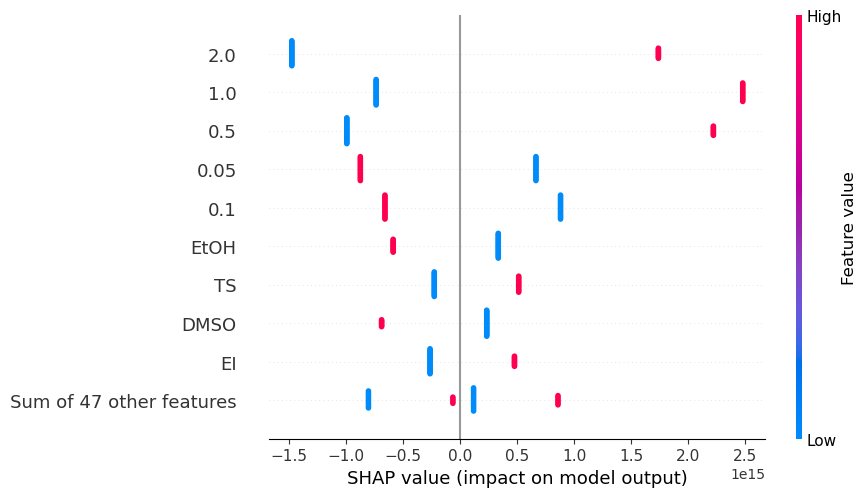

In [163]:
shap.plots.beeswarm(shap_values)

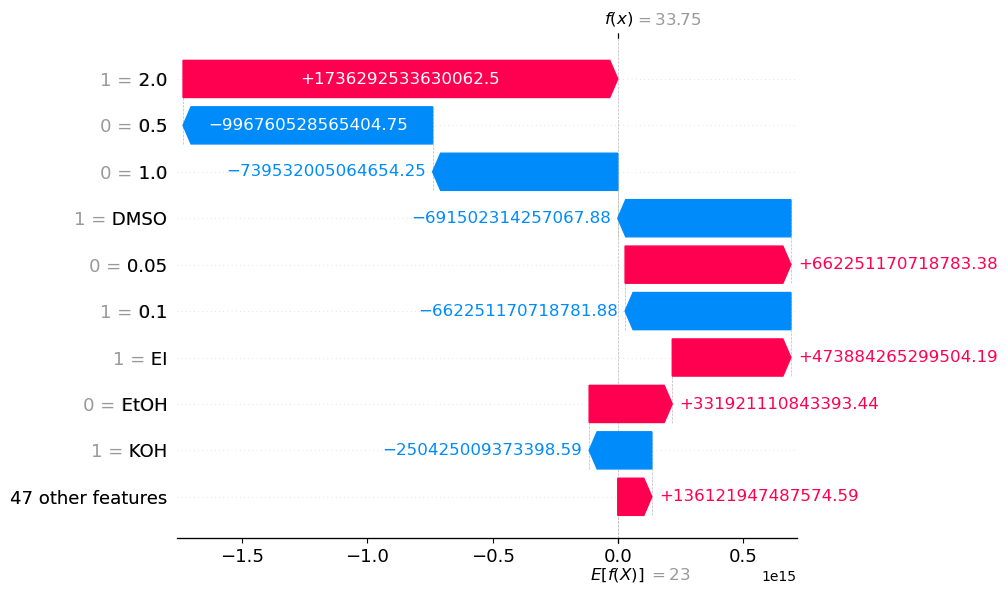

In [165]:
shap_values_test = explainer(x_test)
shap.plots.waterfall(shap_values_test[0])